In [28]:
import pandas as pd
import numpy
import mglearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_moons, load_breast_cancer

### 앙상블

- 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

#### 랜덤 포레스트
- 훈련 데이터에 과적합되는 결정 트리의 주요 단점을 회피할 수 있는 방법

- 여러 결정 트리의 묶음ㅇ으로 서로 다른 방향으로 과대적합된 트리를 많이 많들고 결과를 평균냄으로써 과대적합된 양을 줄이는 아이디어
- 이 아이디어를 구현하려면 결정 트리가 많이 있어야 하고 각각의 트리가 다른 트리와 구별되어야 한다. 
- 이름에서 알 수 있듯이 트리들이 달라지도록 트리 생성 시 무작위성을 주입
- 방법은 데이터 포인트를 무작위로 선택하는 방법과 분할 테스트에서 특성을 무작위로 선택하는 방법으로 2가지가 있다.


#### 랜덤 포레스트 구축

- n_estimators 변수를 통해 모델에서 생성할 트리의 개수를 정한다.
- 각 트리가 고유하게 만들어지도록 n_samples개의 데이터 포인트에서 n_samples 횟수만큼 반복 추출하는 부트스트랩 샘플을 생성
- 이 데이터 셋들로 결정 트리를 만드는데 max_features 변수를 통해 에측 시 몇 개의 특성을 사용할지 선택할 수 있다.
- max_features에 n_features의 수를 설정하면 모든 특성을 고려하기에 특성 선택에 무작위성이 들어가지 않고 부트스트랩 샘플링으로 인한 무작위성만 들어간다.
- max_features를 크게 하면 트리들이 비슷해지고 가장 두드러진 특성을 이용해 데이터에 맞춰질 것이고 낮추면 트리들이 많이 달라지고 각 트리는 데이터 맞추기 위해 깊이가 깊어지게 된다.

- 먼저 알고리즘이 모델에 있는 모든 트리의 예측을 만들고 회귀의 경우는 이 예측들을 평균하여 최종 예측을 만든다.
- 분류의 경우는 각 알고리즘이 가능성있는 출력 레이블의 확률을 제공하고 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스를 예측값으로 하는 약한 투표전략을 사용한다.

In [15]:
## 랜덤 포레스트 분석

X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=6, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=6, random_state=42)

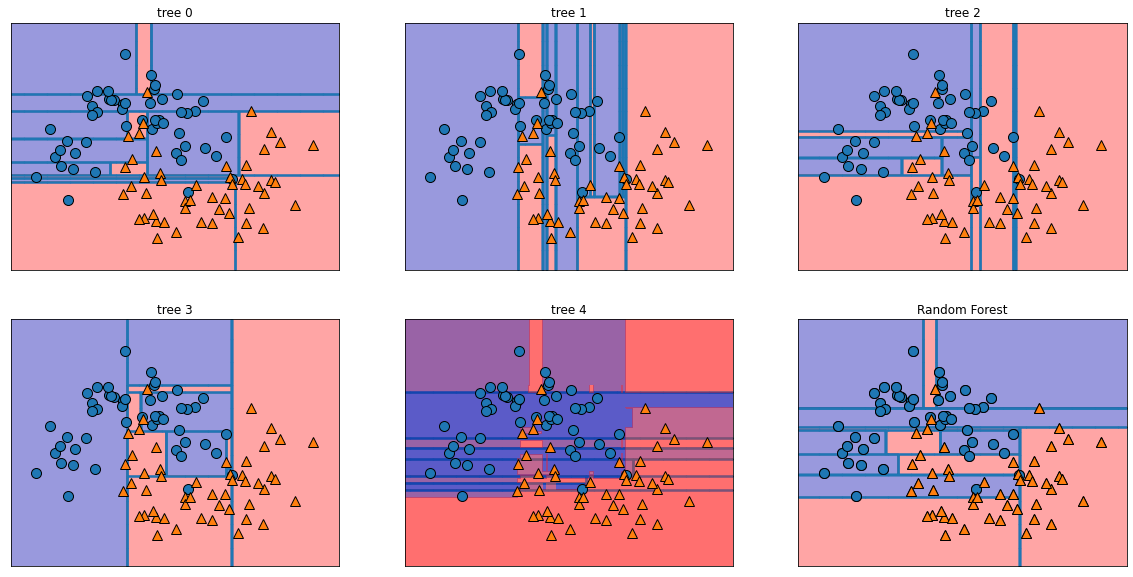

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"tree {i}")
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, 1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

- 다섯 개의 트리가 만든 결정 경계는 부트스트랩 샘플링 떄문에 한쪽 트리에 나타나는 훈련 포인트가 다른 트리에는 포함되지 않을 수 있어 불완전하다.

- 랜덤 포레스트는 개개의 트리보다는 덜 과대적합되고 훨씬 좋은 결정 경계를 생성

In [22]:
## 유방암 데이터 셋에 100의 트리로 이뤄진 랜덤 포레스트 생성

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

print(f'훈련 세트 정확도 {forest.score(X_train, y_train)}')
print(f'테스트 세트 정확도 {forest.score(X_test, y_test)}')

훈련 세트 정확도 1.0
테스트 세트 정확도 0.965034965034965


In [26]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)

- 기본 설정만으로도 선형 모델이나 단일 결정 트리보다 높은 정확도를 보인다.

- 랜덤 포레스트는 기본 설정으로도 좋은 결과를 만들어줄 때가 많다.

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


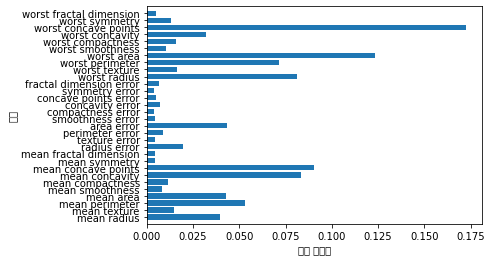

In [29]:
plot_feature_importances_cancer(forest)

- 단일 트리의 경우보다 훨씬 많은 특성이 0이상의 중요도를 갖는다.

- 단일 트리와 마찬가지로 worst radius 특성이 매우 중요하다고 보지만 가장 많은 정보를 가진 특성으로는 worst perimeter를 선택
- 랜덤 포레스트의 무작위성은 알고리즘이 가능성 있는 많은 경우를 고려하여 단일 트리보다 넓은 시각으로 데이터를 바라볼 수 있게 한다.


#### 장단점과 매개변수

- 많은 의사결정 과정 탓에 비전문가에게 예측 과정을 시각적으로 보여주기는 쉽지 않다.
- n_jobs 매개변수를 이용해 연산에 사용할 코어 수를 지정할 수 있고 -1을 지정하면 컴퓨터의 모든 코어를 사용한다.
- 랜덤 포레스트는 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다
- 매우 큰 데이터 셋에도 잘 작동하며 훈련을 여러 CPU코어로 쉽게 병렬화가능한 것이 장점
- 그러나 선형 모델보다 많은 메모리를 사용하여 훈련과 예측이 느리다.

- 중요 매개변수는 n_estimators, max_features이고 max_depth 같은 사전 가지치기 옵션이 있다.
- n_estimators는 많을 수록 과대적합을 줄여 안정적인 모델을 만들지만 더 많은 메모리와 훈련 시간을 요구하므로 가용한 시간과 메모리내에서 많이 만드는 것이 좋다.
- max_features는 과대적합을 줄여주는데 보통 분류는 sqrt(n_features)이고 회귀는 n_features가 기본값으로 일반적으로 유용하다.


-------

#### 그래디언트 부스팅 회귀 트리

- 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법
- 랜덤 포레스트와는 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성한다.
- 기본적으로 무작위성이 없는 대신 강력한 사전 가지치기가 사용된다.
- 보통 하나에서 다섯 정도의 깊지 않은 트리를 사용하여 메모리를 적게 사용하고 예측이 빠르다. (근본 아이디어가 약한 학습기, 트리는 추가될수록 성능 향상)
- 랜덤 포레스트보다 매개변수 설정에 좀 더 민감하지만 더 높은 정확도를 제공해주기도 한다.

- 이전 트리의 오차를 얼마나 강하게 보정할 것인지 제어하는 learning_rate가 중요한 매개변수이다. 
- 클수록 보정을 강하게 하여 모델이 복잡해진다.



In [31]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)

print(f'훈련 세트 정확도 {gbrt.score(X_train, y_train)}')
print(f'테스트 세트 정확도 {gbrt.score(X_test, y_test)}')

훈련 세트 정확도 1.0
테스트 세트 정확도 0.958041958041958


- 훈련 세트의 정확도가 100%로 과대적합이 의심된다. 

- 이를 막기위해 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있다.

In [32]:
gbrt = GradientBoostingClassifier(random_state=42, max_depth=1)
gbrt.fit(X_train, y_train)

print(f'훈련 세트 정확도 {gbrt.score(X_train, y_train)}')
print(f'테스트 세트 정확도 {gbrt.score(X_test, y_test)}')

훈련 세트 정확도 0.9906103286384976
테스트 세트 정확도 0.965034965034965


In [33]:
gbrt = GradientBoostingClassifier(random_state=42, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print(f'훈련 세트 정확도 {gbrt.score(X_train, y_train)}')
print(f'테스트 세트 정확도 {gbrt.score(X_test, y_test)}')

훈련 세트 정확도 0.9929577464788732
테스트 세트 정확도 0.958041958041958


- 두 방식은 모델의 복잡도를 감소시켜 훈련 세트의 정확도가 낮아졌다.
- 학습률을 낮추는 것과 달리 최대 깊이를 낮추는 것이 성능 향상에 큰 기여를 했다.

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


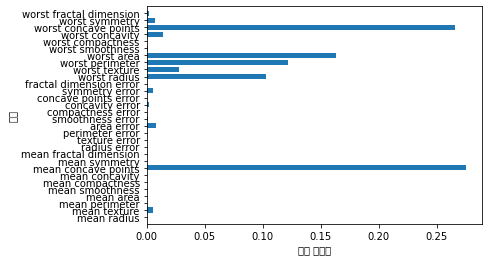

In [34]:
gbrt = GradientBoostingClassifier(random_state=42, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

- 랜덤 포레스트와 비슷한 특성을 강조하지만 일부 특성을 완전히 무시하고 있다.

- 보통 더 안정적인 랜덤 포레스트를 먼저 적용한다.
- 예측 시간이 더 중요하거나 모델에서 마지막 성능까지 쥐어짤 때 사용하면 도움이 된다.
- 대규모 머신러닝 문제에 그래디언트 부스팅을 적용하려면 xgboost 혹은 파이썬 인터페이스를 검토해보는 것이 좋다. (scikit-learn 것보다 빠르고 쉽다)

#### 장단점과 매개변수

- 가장 큰 단점은 매개변수를 잘 조정해야 한다는 것과 훈련 시간이 길다는 것

- 트리 기반 모델 특성상 희소한 고차원 데이터에는 잘 작동하지 않는다.
- 하지만 특성의 스케일을 조정하지 않아도 되고 이진 특성이나 연속적인 특성에서도 잘 동작한다는 트리 기반 모델의 장점도 존재
  #
  #
- 중요한 매개변수로는 n_estimators와 learning_rate가 있다.

- learning_rate를 낮추면 비슷한 복잡도의 모델을 위해 더 많은 트리를 추가해야 한다.
- n_estimators가 클수록 좋은 랜덤 포레스트와 달리 그레디언트 부스팅에서는 모델이 복잡해지고 과적합 가능성이 높아진다.
- 또 다른 중요한 변수는 max_depth(또는 max_leaf_nodes) 인데 일반적으로 매우 작게 설정하며 5보다 깊어지지 않게 한다.